In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Para clustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Para componentes principales
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Práctica 8: Componentes principales

## Ej 1: Dada la siguiente tabla de datos correspondientes a la longitud y el ancho de las tortugas pintadas

In [2]:

df = {"Longitud": [93, 94, 96, 101, 102, 103, 104, 106],
      "Ancho": [76, 78, 80, 84, 85, 82, 83, 83]}
df = pd.DataFrame(df)
df

,Longitud,Ancho
0,93,76
1,94,78
2,96,80
3,101,84
4,102,85
5,103,82
6,104,83
7,106,83


### a) Normalizar las variables para que tengan media 0 y hacer el diagrama de dispersión. Estimar la presencia de correlación entre las variables a partir de este gráfco

In [3]:
df[["Longitud", "Ancho"]] = MinMaxScaler().fit_transform(df[["Longitud", "Ancho"]])
df

,Longitud,Ancho
0,0.000000,0.000000
1,0.076923,0.222222
2,0.230769,0.444444
3,0.615385,0.888889
4,0.692308,1.000000
5,0.769231,0.666667
6,0.846154,0.777778
7,1.000000,0.777778


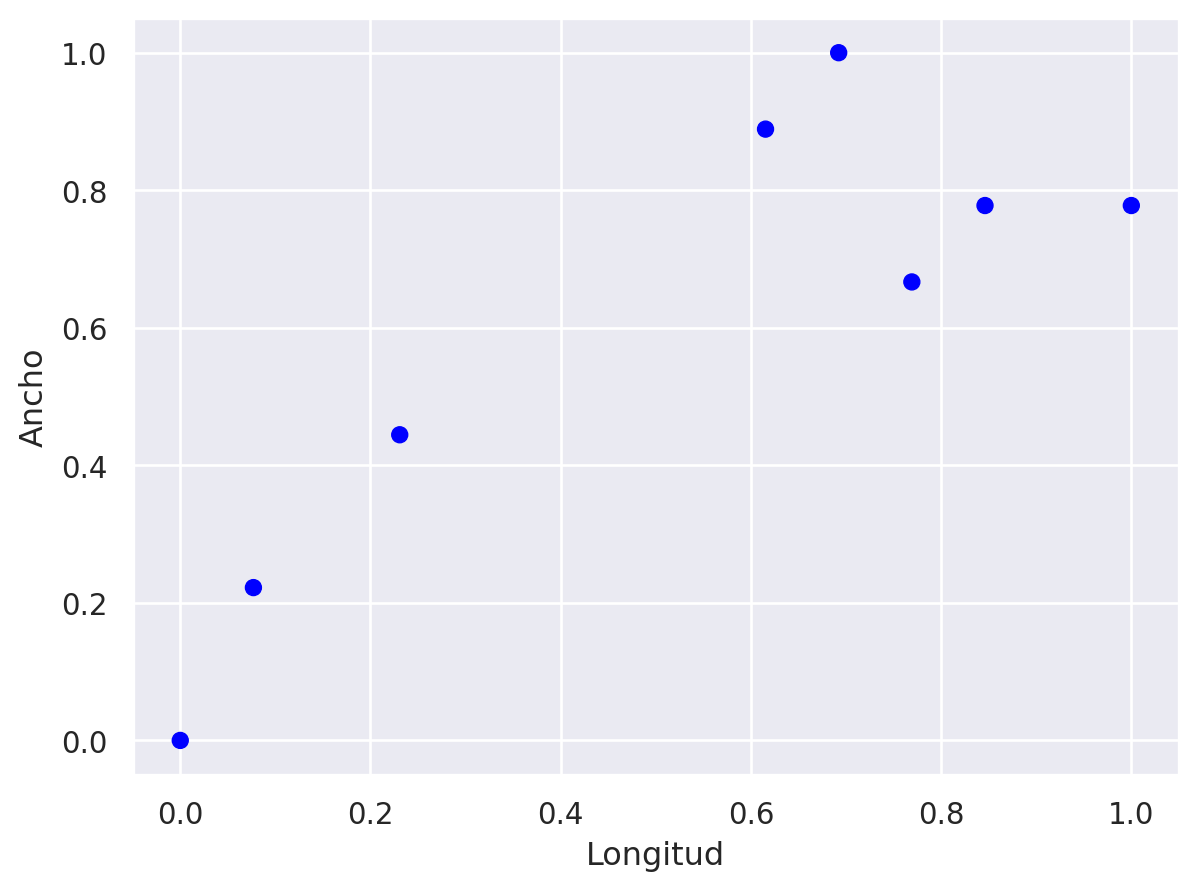

In [4]:
# Graficamos
(
    so.Plot(data = df, x = "Longitud", y = "Ancho")
    .add(so.Text(valign = "bottom"))
    .add(so.Dot(color = "blue"), data = df, x = "Longitud", y = "Ancho")
)

In [5]:
df.corr()

,Longitud,Ancho
Longitud,1.000000,0.858572
Ancho,0.858572,1.000000


### b) Calcular la matriz de covarianzas y hallar sus autovalores y autovectores

In [6]:
df_star = df - df.mean()

Sigma = (df_star.transpose() @ df_star) / len(df_star)

In [7]:
# Matriz de covarianza
np.cov(df.transpose(), bias = 1)

array([[0.12342825, 0.09762286],
       [0.09762286, 0.10474537]])

In [8]:
# Autovalores , Autovectores
gamma, U = np.linalg.eigh(Sigma)   # eigh es un comando especial para matrices simétricas
print("avals: \n", gamma, "\n")
print("avecs: \n",U)

avals: 
 [0.01601803 0.21215559] 

avecs: 
 [[ 0.6725868  -0.74001824]
 [-0.74001824 -0.6725868 ]]


### c) Hallar las componentes principales

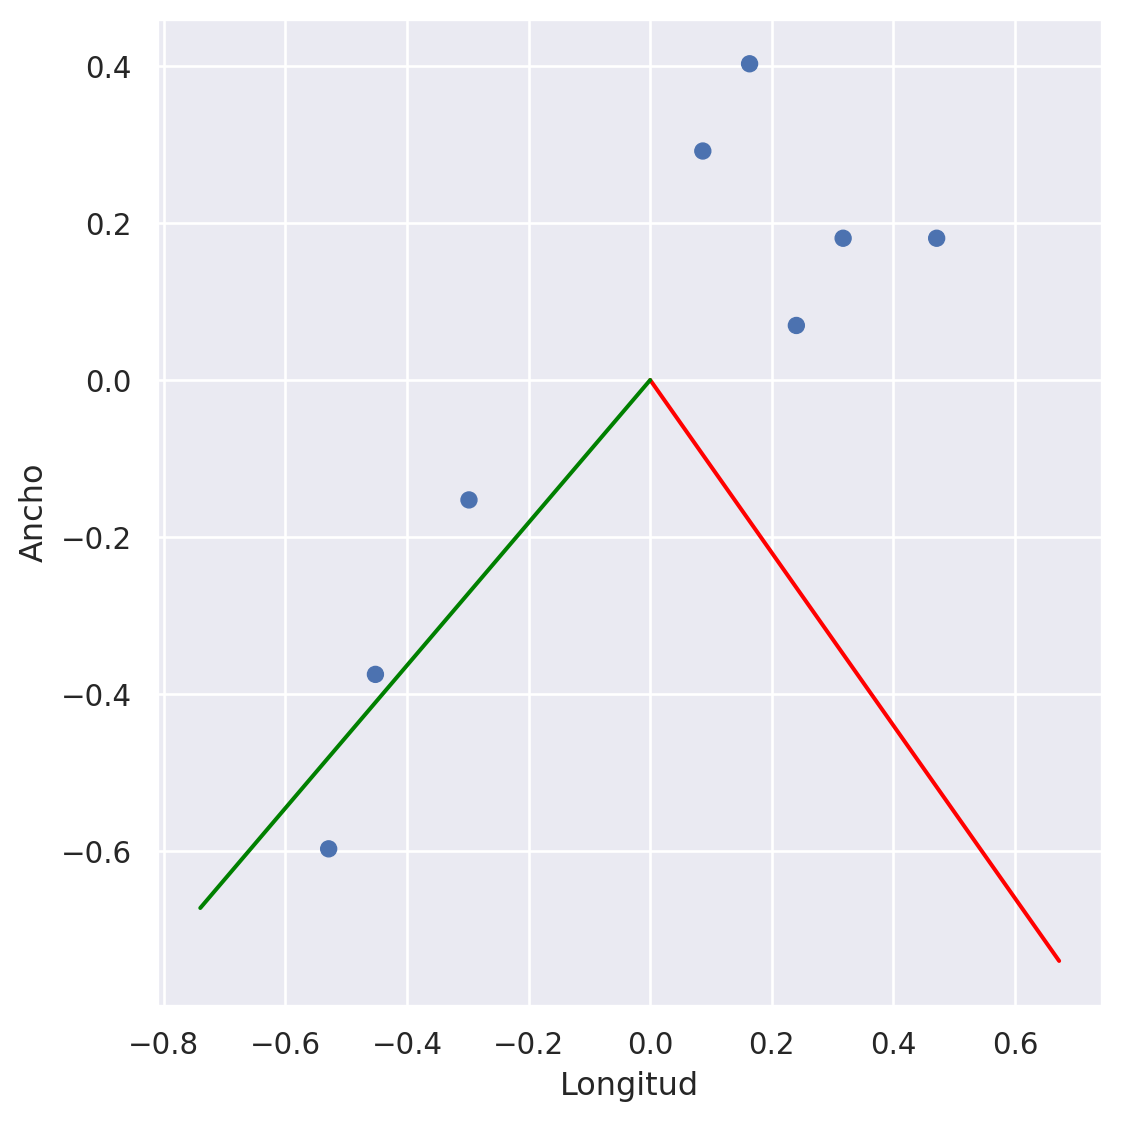

In [9]:
(
    so.Plot()
    .add(so.Dot(), x = df_star["Longitud"], y = df_star["Ancho"])
    .add(so.Line(color = "red"), x = [0,U[0,0]], y = [0,U[1,0]])
    .add(so.Line(color = "green"), x = [0,U[0,1]], y = [0,U[1,1]])
    .layout(size = (6, 6))
)

# Verde: 1er componente ppal
# Rojo: 2do componente ppal

In [10]:
# U son las direcciones del nuevo espacio
# Calculamos las componentes principales usando la formula
# Z = (df - df_raya) * U = df_star * U


Z = df_star @ U 
Z.columns = ["Z" + str(i + 1) for i in Z.columns]
Z

,Z1,Z2
0,0.086260,0.793040
1,-0.026451,0.586651
2,-0.087424,0.323339
3,-0.157634,-0.260211
4,-0.188121,-0.391868
5,0.110289,-0.224596
6,0.079803,-0.356253
7,0.183277,-0.470102


Estos son los componentes principales

---

### d) Decidir si la información está mayormente representada en una de estas dos componentes

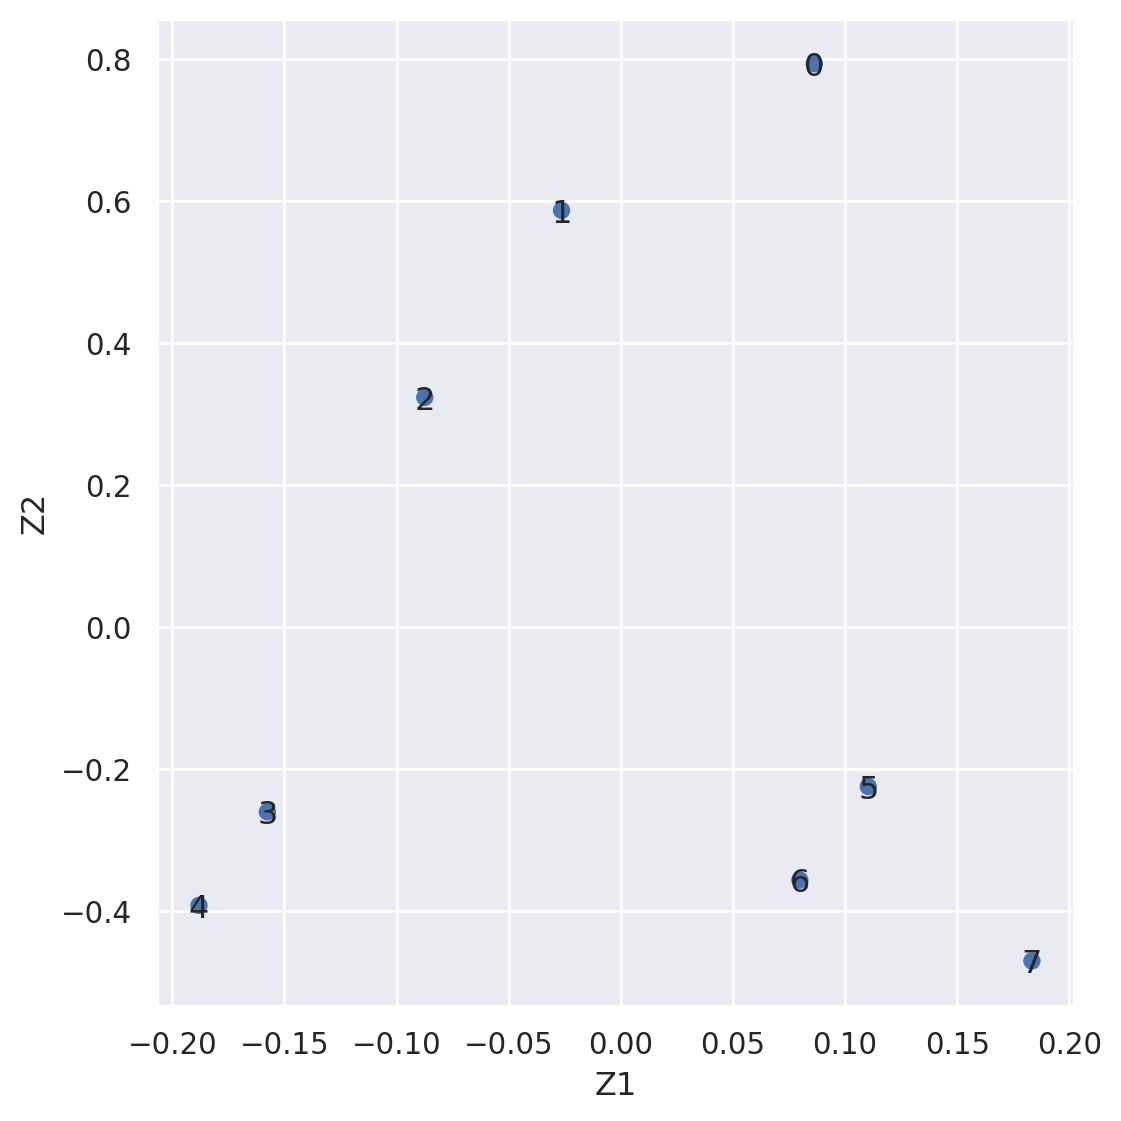

In [11]:
# Graficamos
(
    so.Plot(data = Z, x = "Z1", y = "Z2", text = df.index)
    .add(so.Dot())
    .add(so.Text())    
    .layout(size=(6,6))
)

In [12]:
# Repetimos todo lo mismo usando los comandos de Python

pca = PCA(n_components=2)

# principalComponents devuelve X_star * U
principalComponents = pca.fit_transform(df_star)
print(principalComponents)

[[-0.79303958 -0.08626039]
 [-0.58665137  0.02645066]
 [-0.32333868  0.08742426]
 [ 0.26021119  0.15763403]
 [ 0.39186754  0.18812083]
 [ 0.22459642 -0.11028936]
 [ 0.35625276 -0.07980256]
 [ 0.47010172 -0.18327746]]


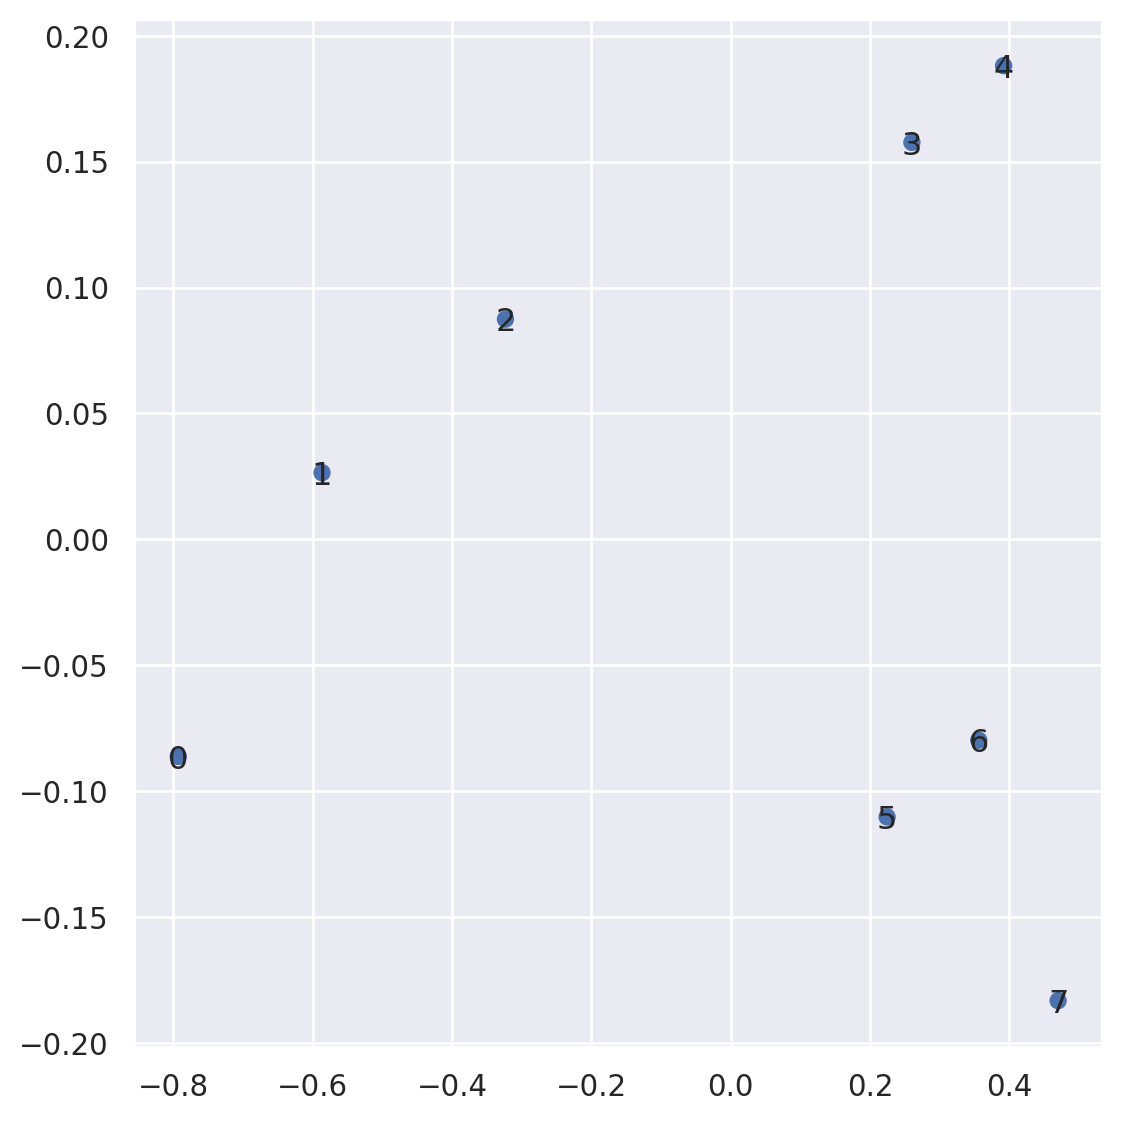

In [13]:
# Graficamos
(
    so.Plot(x = principalComponents[:,0], y = principalComponents[:,1], text = df.index)
    .add(so.Dot())
    .add(so.Text())
    .layout(size=(6,6))
)

Confio mas en esta representacion ya que usamos directamente la funcion pca, y no la armamos de 0 a mano.

In [14]:
# Veamos que variables aparecen más fuertemente en cada componente
pca.components_

array([[ 0.74001824,  0.6725868 ],
       [-0.6725868 ,  0.74001824]])

La informacion esta igualmente representada en las 2 componentes

---

### e) Indicar la proporción de la variabilidad explicada por cada una de ellas. ¿A que conclusión puede llegar?

In [15]:
print(Sigma, " \n")

# autovalores ordenados de mayor a menor
av = np.flip(U)
print("Autovalores: ", av, " \n")

print("Varianza explicada por la primera componente:  \n", av[0] / sum(av))
print("Varianza explicada por la segunda componente:  \n", av[1] / sum(av))

          Longitud     Ancho
Longitud  0.123428  0.097623
Ancho     0.097623  0.104745  

Autovalores:  [[-0.6725868  -0.74001824]
 [-0.74001824  0.6725868 ]]  

Varianza explicada por la primera componente:  
 [ 0.47613224 10.97438096]
Varianza explicada por la segunda componente:  
 [ 0.52386776 -9.97438096]


Llegamos entonces a que los autovalores tienen el mismo peso, y tambien la varianza explicada en la componente 1 es casi identica a la de la componente 2 solo que con un -9.97 en vez de un 10. 
No se is influye.

## Ej 2: Sea A la matriz de covarianzas de una cierta muestra de datos cuya media es cero.

$$
A = \left(
   \begin{array}{cccc}
    3 & 1 & 1 \\
    1 & 3 & 1\\
    1 & 1 & 5\\
   \end{array}
   \right)
$$

### a) Hallar los autovalores y autovectores de la matriz de covarianzas.

In [16]:
a = np.matrix([[3, 1, 1], [1, 3, 1], [1, 1, 5]])

In [17]:
# Matriz de covarianza
a_cov = np.cov(a.transpose(), bias = 1)
a_cov

array([[ 0.88888889, -0.44444444, -0.88888889],
       [-0.44444444,  0.88888889, -0.88888889],
       [-0.88888889, -0.88888889,  3.55555556]])

In [18]:
# Autovalores , Autovectores
gamma, U = np.linalg.eigh(a_cov)   # eigh es un comando especial para matrices simétricas
print("avals: \n", gamma, "\n")
print("avecs: \n",U)

# Creo que printea mal los avecs y avals. Preguntar a los profesores

avals: 
 [-2.28941888e-16  1.33333333e+00  4.00000000e+00] 

avecs: 
 [[ 6.66666667e-01 -7.07106781e-01 -2.35702260e-01]
 [ 6.66666667e-01  7.07106781e-01 -2.35702260e-01]
 [ 3.33333333e-01 -1.11022302e-16  9.42809042e-01]]


### b) Dar la expresión de las componentes principales z1, z2, z3 e indicar la proporción de la variabilidad explicada por cada una de ellas

In [19]:
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(a_cov)
print(principalComponents)

[[-1.57134840e+00  9.42809042e-01 -8.45934412e-17]
 [-1.57134840e+00 -9.42809042e-01 -8.45934412e-17]
 [ 3.14269681e+00  2.96059473e-16 -8.45934412e-17]]


In [20]:
Z = a @ U
Z

matrix([[ 3.00000000e+00, -1.41421356e+00,  3.33066907e-16],
        [ 3.00000000e+00,  1.41421356e+00,  2.22044605e-16],
        [ 3.00000000e+00, -7.77156117e-16,  4.24264069e+00]])

In [21]:
Z = pd.DataFrame(a @ U, columns=["Z1", "Z2", "Z3"])
Z

,Z1,Z2,Z3
0,3.0,-1.414214e+00,3.330669e-16
1,3.0,1.414214e+00,2.220446e-16
2,3.0,-7.771561e-16,4.242641e+00


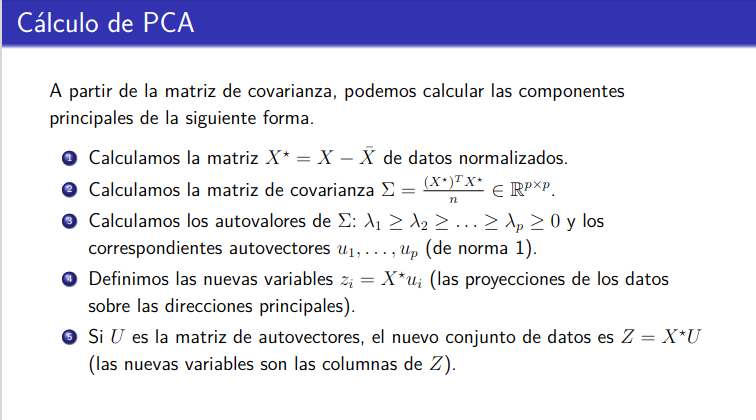


In [22]:
# 1. No hace falta si usamos la matriz de covarianza a_cov en lugar de a

# 2. Matriz de covarianza
a_cov

# 3. Obtener los autovalores y autovectores
avals, U = np.linalg.eig(a_cov)

print("Autovalores:")
print(avals)
print("\nAutovectores:")
print(U)

Autovalores:
[4.00000000e+00 3.29326410e-17 1.33333333e+00]

Autovectores:
[[-2.35702260e-01  6.66666667e-01  7.07106781e-01]
 [-2.35702260e-01  6.66666667e-01 -7.07106781e-01]
 [ 9.42809042e-01  3.33333333e-01 -1.91675850e-16]]


In [23]:
# 4. Definimos las nuevas variables Z_i = X * U_i (en este caso X = a)
Z = a @ U
Z = pd.DataFrame(Z, columns=["Z1", "Z2", "Z3"])
Z

,Z1,Z2,Z3
0,3.330669e-16,3.0,1.414214e+00
1,4.440892e-16,3.0,-1.414214e+00
2,4.242641e+00,3.0,-9.583792e-16


In [24]:
# autovalores ordenados de mayor a menor
print("Autovalores: \n", avals, " \n")

print("Varianza explicada por la primera componente:  \n", avals[0] / sum(avals))
print("Varianza explicada por la segunda componente:  \n", avals[1] / sum(avals))
print("Varianza explicada por la tercera componente:  \n", avals[2] / sum(avals))

Autovalores: 
 [4.00000000e+00 3.29326410e-17 1.33333333e+00]  

Varianza explicada por la primera componente:  
 0.7499999999999999
Varianza explicada por la segunda componente:  
 6.174870185483852e-18
Varianza explicada por la tercera componente:  
 0.2500000000000001


Podemos ver que la varianza explicada por la 2da componente es la mas pesada, entonces si nos tuvieramos que quedar con un lambda , éste sería el 1ro, pues tiene mayor peso.

Ademas ya que tenemos los autovalores, podemos calcular la varianza total:

 $$ \lambda_1 + \lambda_2 + \lambda_3 = 4 + 0 + 1.33 = 5.33 $$


### c) Hallar los scores de las primeras dos componentes principales correspondientes a la observación x1 = 2, x2 = 2, x3 = 1 (es decir, los valores de z1 y z2 para dicha observación.

In [25]:
# Observación x1 = 2, x2 = 2, x3 = 1
x = np.array([2, 2,Z 1])

# Estandarizar la observación
x_std = (x - x.mean()) / x.std()

# Calcular los scores de las primeras dos componentes principales
scores = x_std @ U[:, :2] # Seleccionamos todas las filas de U, pero solo las dos primeras columnas.

# Imprimir los scores
print(scores)

[-1.66666667  0.47140452]


In [26]:
# Recordar que podemos obtener Z1, Z2, Z3. Pero nos interesan solamente Z1 y Z2.
scores = x_std @ U
scores

array([-1.66666667e+00,  4.71404521e-01,  2.71070586e-16])

## Ej 3: Implementar un programa que reciba como input un archivo de datos y un número p_acum y devuelva la mínima cantidad de componentes principales que deben considerarse para que el porcentaje de varianza acumulada sea mayor o igual que p_acum.

In [27]:
# Implementamos el programa p_acum que devuelve la minima cant de comp ppales tq la varianza acumulada sea >= a p_acum
# Supongo que con archivo de datos se refiere a una matriz ??
def p_acum(datos, p_acum):
    # normalizamos los datos
    datos_norm = datos - datos.mean()

    # calculamos la matriz de covarianza
    cov = np.cov(datos_norm.transpose(), bias = 1)

    # calculamos los autovalores y autovectores
    avals, U = np.linalg.eig(cov)

    # ordenamos los autovalores de mayor a menor
    avals = np.flip(np.sort(avals)) # sort devuelve menor a mayor, flip lo ordena mayor a menor

    # calculamos la varianza acumulada
    var_acum = np.cumsum(avals) / sum(avals)

    # calculamos la cantidad de componentes principales necesarias
    n = 1
    while var_acum[n - 1] < p_acum:
        n += 1
    
    return n



In [28]:
# Probemos con el ejemplo de la matriz a que usamos antes y p_acum = 0.95
p_acum(a, 0.95)

2

## Ej 4: Considerando el archivo de datos p8-chalets.csv se pide:

In [31]:
# importar p8-chalets.csv
chalets_df = pd.read_csv("dataset/p8-chalets.csv")

### a) Graficar los diagramas de dispersión de las variables de a pares. Estimar la presencia de correlación entre las variables a partir de estos gráficos.

In [32]:
chalets_df

,Promotora,DuracionHipoteca,PrecioMedio,SuperficieCocina
0,1,8.7,0.3,3.1
1,2,14.3,0.9,7.4
2,3,18.9,1.8,9.0
3,4,19.0,0.8,9.4
4,5,20.5,0.9,8.3
5,6,14.7,1.1,7.6
6,7,18.8,2.5,12.6
7,8,37.3,2.7,18.1
8,9,12.6,1.3,5.9
9,10,25.7,3.4,15.9


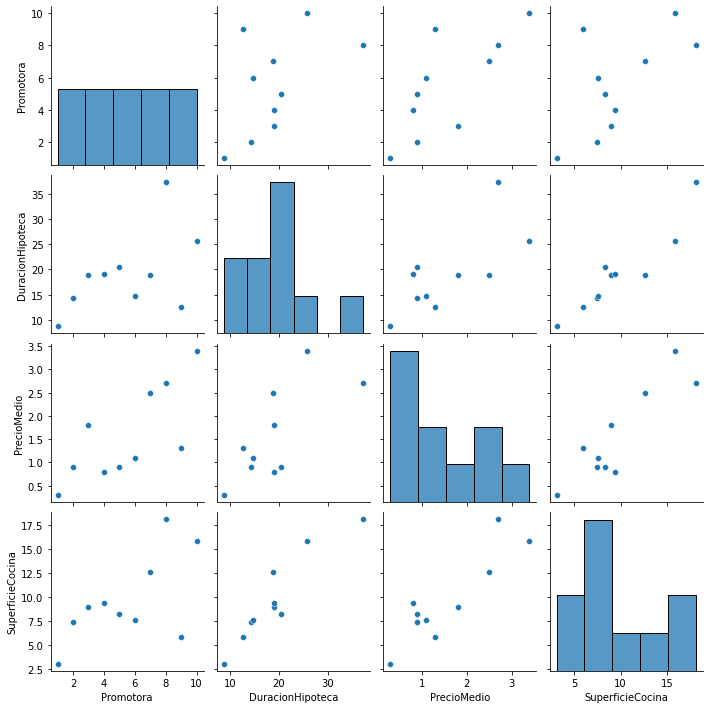

In [36]:
# Graficamos los diagramas de dispersion
sns.pairplot(chalets_df)

### b) Cacular la matriz de covarianza

In [37]:
chalets_df.cov()

,Promotora,DuracionHipoteca,PrecioMedio,SuperficieCocina
Promotora,9.166667,12.594444,2.250000,8.838889
DuracionHipoteca,12.594444,63.298333,5.745000,33.863889
PrecioMedio,2.250000,5.745000,0.993444,4.053222
SuperficieCocina,8.838889,33.863889,4.053222,20.849000


### c) A partir de lo observado, resulta razonable pensar en un análisis de componentes principales para reducir la dimensión del problema?

Supongo?

### d) Hallar la 1ra componente principal

In [48]:
# Buscamos autovalores y autovectores
gamma, U = np.linalg.eigh(chalets_df.cov())

In [51]:
# Calculamos Z : componentes principales
Z = chalets_df @ U
Z

,0,1,2,3
0,-0.053086,1.193440,1.368804,-9.115331
1,0.246092,0.139962,1.399297,-16.187088
2,-0.466164,0.778486,1.588235,-21.144838
3,0.656059,1.133769,0.792020,-21.532693
4,0.159676,2.940819,0.600182,-22.492574
5,0.334347,1.560394,-2.159721,-17.431265
6,0.219852,-0.850672,-2.903152,-23.627309
7,0.120714,2.261785,1.316171,-42.229462
8,0.006337,3.159309,-5.276772,-15.441321
9,-0.055742,0.061201,-4.089344,-31.751070


### e) Indicar qué porcentaje de variabilidad total logra explicar esta componente

In [58]:
# Veamos los avals de la covarianza del dataframe
gamma = np.flip(np.sort(gamma))
display(gamma)
# Y la suma de todos los lambdas
display(gamma.sum())

# Ahora buscamos el porcentaje de variabilidad que explica cada componente
porc = gamma / gamma.sum()
display(porc)

array([85.75092933,  6.81227195,  1.65779898,  0.08644418])

94.30744444444446

array([0.90926999, 0.07223472, 0.01757867, 0.00091662])

Vemos que la 1ra componente (ordenada de mayor a menor) explica un 90.9%

## Ej 5: Considerar el dataset p8-iris.txt, que representa información del largo y ancho del pétalo y del sépalo de diversas muestras de flores de la especie Iris, la cual se puede distinguir en varias subespecies. 

Aplicar el programa del ejercicio anterior para determinar la menor cantidad de componentes principales necesarias para alcanzar un 90 % de variabilidad. 

Graficar los datos transformados que se obtienen luego de reducir variables

In [76]:
# importar p8-iris.txt
iris = open("dataset/p8-iris.txt")